In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import acf, pacf
import pandas.util.testing as tm


In [ ]:
#Para empezar esta actividad, realizamos los mismos pasos que en la actividad 3 para crear nuestro DataFrame con la informaciòn de la estaciòn meteorologìca.
#Creamos nuestro DataFrame inicial leyendo el archivo de datos desde el repositoria de github.
url = "https://raw.githubusercontent.com/OscarAngul0/FisicaComputacional1/master/Actividad1/25015.txt"
#CREAMOS NUESTRO DATA FRAME
my_col = ["Fecha","Precip","Evap","T_Max","T_min"]
df_data = pd.read_csv(url, names=my_col, encoding="cp1251", sep="\s+", header=None, skiprows=19, skipfooter=1, engine="python")
#url es la direccion del archivo, names nos da nombres a las columnas, enncoding le dice a python que el archivo tienes caracteres en español. sep es el formato de separacion de datos. header son comentarios al principio del archivo
#verificamos que el dataframe se haya creado correctamente
#print (df_data.head(), df_data.tail())
str_Nulo = 'Nulo'
df_data1 = df_data.replace(to_replace=str_Nulo, value='', regex=True)
#convertimos la informacion a numeros flotantes
cols1 = ['Precip', 'Evap', 'T_Max', 'T_min']
for cols in cols1:
  df_data1[cols] = pd.to_numeric(df_data1[cols], errors='coerce')
  #verificamos cuantos datos nulos hay
df_data1.isnull().sum() 
#vemos que casi no faltan datos en relacion al numero de dias donde tenemos mediciones
#hacemos estadistica
df_data1.describe()
#trabajamos la columa de las fechas
df_data2=df_data1.copy()
df_data2["Fecha"] = pd.to_datetime(df_data2["Fecha"], dayfirst=True)
 #print (df_data2.head())
df_data2.dtypes
#Agregamos 2 nuevas columnas poara denotar el año y el mes, esto se hace para facilitar el filtrado de informacion +adelante
df_data2["Año"]=df_data2["Fecha"].dt.year
df_data2["Mes"]=df_data2["Fecha"].dt.month
# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes en unavariable de tipo caracter
df_data2.drop('Mes', axis=1, inplace=True) #inplace=true hace que los cambios en esa columnna se hagan directamente sobre el dataframe original.
df_data2['Mes'] = df_data2['Fecha'].dt.strftime('%b')
print (df_data2.info())
print (df_data2.head(), df_data2.tail())
print (df_data2.dtypes)
#Nos aseguramos que el data frame, contenga los datos del tipo correcto
print (df_data2.shape)
print (df_data2.describe)
print (df_data2.isnull().sum() )
#Obtenemos la informacion general de nuestro DataFrame, asi completando lo necesario para comenzar con el analisis exploratorio de datos 
#HACEMOS NUESTRA SERIE DE TIEMPO
df_datas=df_data2.copy
df_datas=df_data2.set_index("Fecha")
#confirmamos 
df_datas.info()
#seleccionamos nuestros conjuntos de datos
df_60 = df_datas[(df_datas["Año"]>=1960) & (df_datas["Año"]<1990)]
df_90=df_datas[(df_datas["Año"]>=1990)&(df_datas["Año"]<2020)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21266 entries, 0 to 21265
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   21266 non-null  datetime64[ns]
 1   Precip  21237 non-null  float64       
 2   Evap    20900 non-null  float64       
 3   T_Max   21190 non-null  float64       
 4   T_min   21179 non-null  float64       
 5   Año     21266 non-null  int64         
 6   Mes     21266 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.1+ MB
None
       Fecha  Precip  Evap  T_Max  T_min   Año  Mes
0 1961-01-01     0.0   2.9   22.0   10.5  1961  Jan
1 1961-01-02     0.0   2.7   25.0    9.0  1961  Jan
2 1961-01-03     0.0   3.7   29.0   10.0  1961  Jan
3 1961-01-04     0.0   2.5   22.0   13.0  1961  Jan
4 1961-01-05     0.0   1.1   24.0   14.0  1961  Jan            Fecha  Precip  Evap  T_Max  T_min   Año  Mes
21261 2019-04-26     0.0   6.9   36.0   16

In [ ]:
#ANALISIS DE LA SERIE DE TIEMPO
def test_stationarity(df_ts):
  #DEFINIR PROMEDIOS MOVILES
    rolmean = df_ts.rolling(window=365, center=True).mean()
    rolstd = df_ts.rolling(window=365, center=True).std() 
 # DEFINIMOS EL TAMAÑO DE LA FIGURA
    plt.rcParams["figure.figsize"] = (20,10)
#GRAFICAMOS LOS PROMEDIOS MOVILES Y LA DESVIACION ESTANDAR JUNTOS LOS DATOS
    plt.plot(df_ts, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Promedio movil')
    plt.plot(rolstd, color='black', label = 'Desviacion estandar movil')
    plt.legend(loc='best')
    plt.title('Promedio Móvil y Desviación Estándar ')
    plt.grid()
    plt.show()
 #REALIZAMOS LA PRUEBA AUMENTADA DE DICKEY FULLER
    print('Resultados de la Prueba aumentado de Dickey-Fuller:')
    dftest = adfuller(df_ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


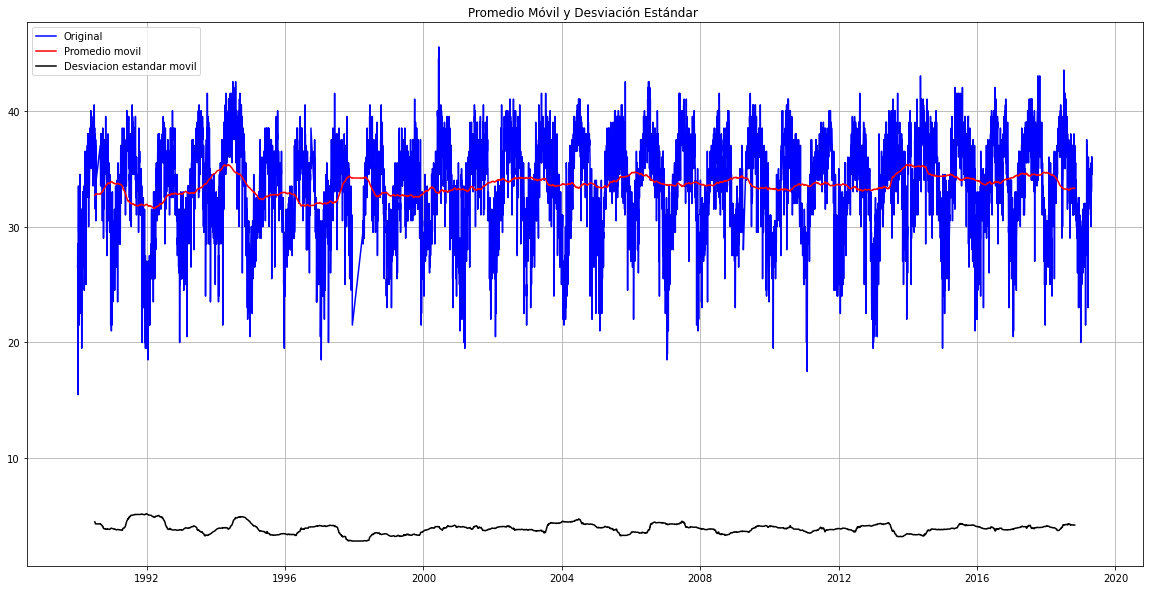

Resultados de la Prueba aumentado de Dickey-Fuller:
Test Statistic                -8.007993e+00
p-value                        2.240643e-12
#Lags Used                     3.500000e+01
Number of Observations Used    1.034600e+04
Critical Value (1%)           -3.430982e+00
Critical Value (5%)           -2.861819e+00
Critical Value (10%)          -2.566919e+00
dtype: float64


In [ ]:
df_90.ffill(axis=0, inplace=True) 
test_stationarity(df_90["T_Max"])
#afortunadamente podemos ver que nuestra serie resulto ser estacionaria 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


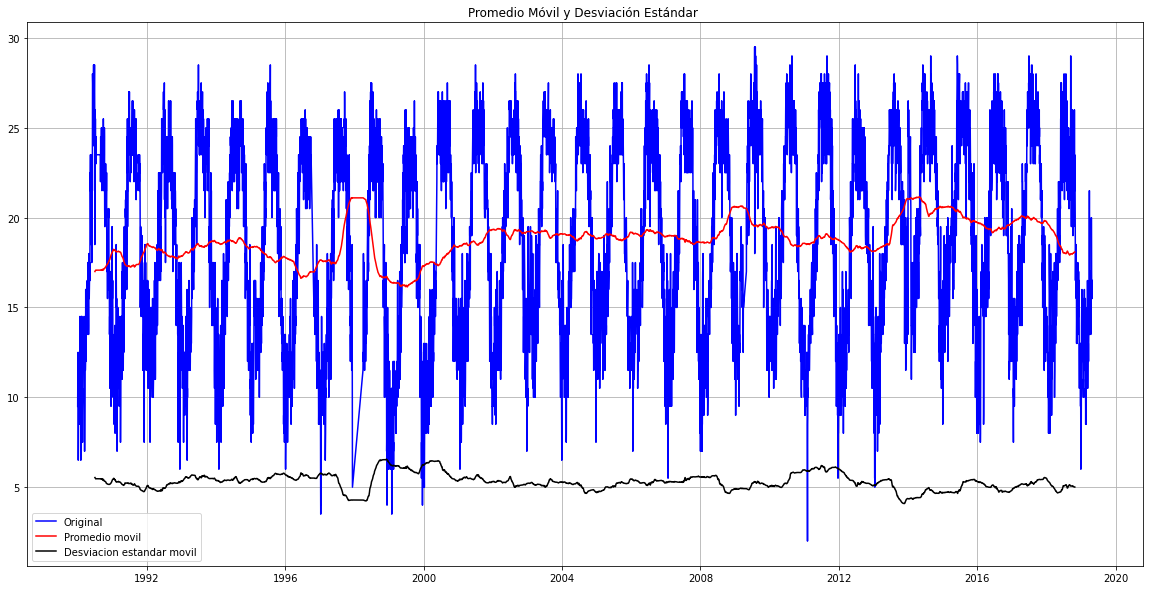

Resultados de la Prueba aumentado de Dickey-Fuller:
Test Statistic                -7.916536e+00
p-value                        3.822870e-12
#Lags Used                     3.900000e+01
Number of Observations Used    1.034200e+04
Critical Value (1%)           -3.430982e+00
Critical Value (5%)           -2.861820e+00
Critical Value (10%)          -2.566919e+00
dtype: float64


In [ ]:
df_90.ffill(axis=0, inplace=True) 
test_stationarity(df_90["T_min"])
#afortunadamente podemos ver que nuestra serie resulto ser estacionaria de nuevo sin problemas

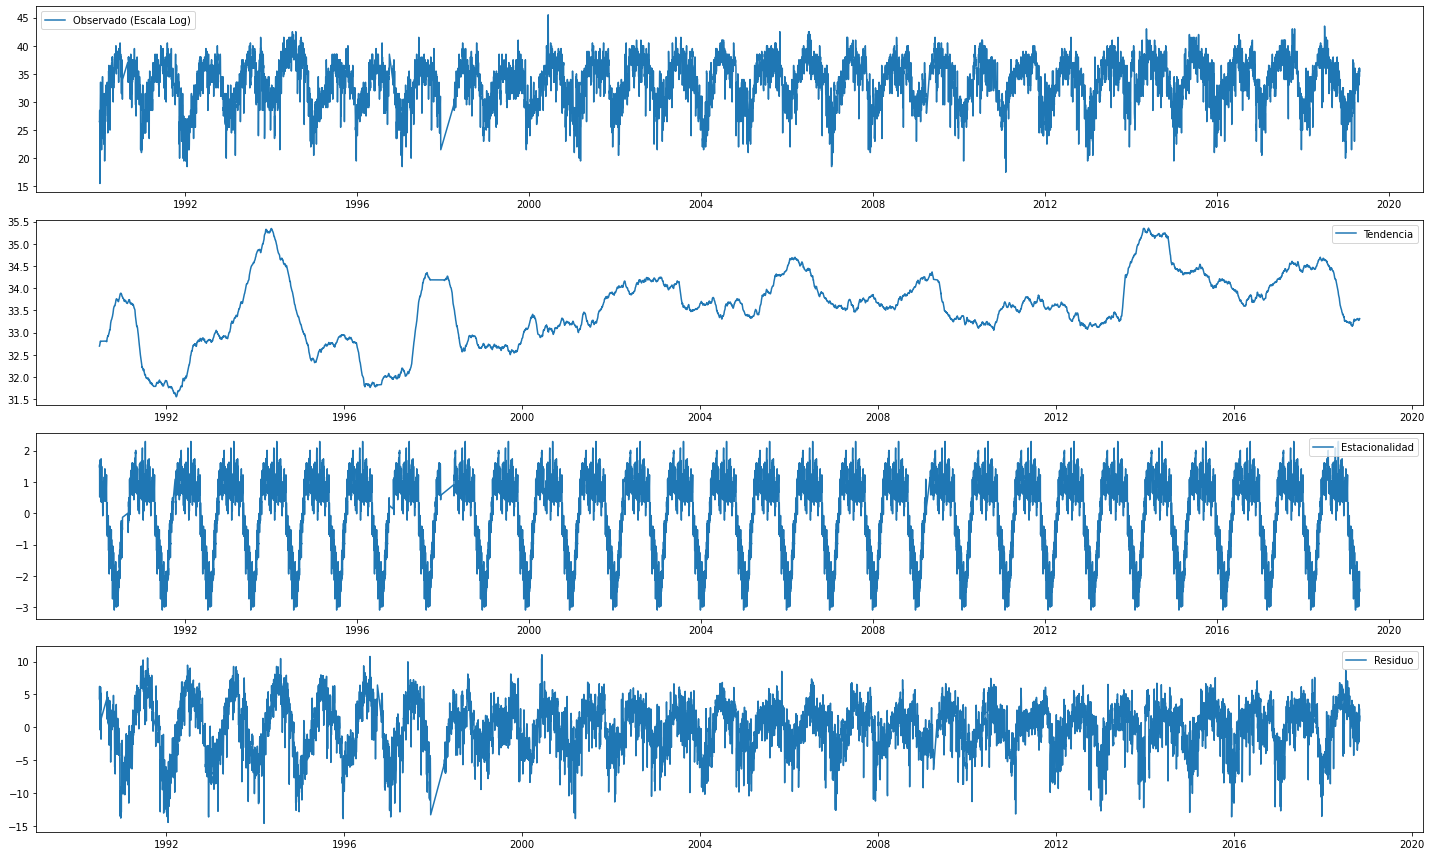

In [ ]:
#DESCOMPONEMOS NUESTRA SERIE DE TIEMPO DE T_Max y T_min
#hacemos datas frames especiales
ts_tmax=df_90["T_Max"]
#ts_tmax.tail()
#hacemos la descomposición de la serie de tiempo, obs=tendencia+estacionalidad+residuo
# Método de descomposición usando la biblioteca statsmodels.tsa
decomposition = sm.tsa.seasonal_decompose(ts_tmax.interpolate(), model='additive', freq=365)
# GRAFICAMOS LOS 3 COMPONENTES
trend = decomposition.trend
seasonal = decomposition.seasonal
residue = decomposition.resid
plt.rcParams["figure.figsize"] = (20,12)
plt.subplot(411)
plt.plot(ts_tmax, label='Observado (Escala Log)')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residue, label='Residuo')
plt.legend(loc='best')

plt.tight_layout();




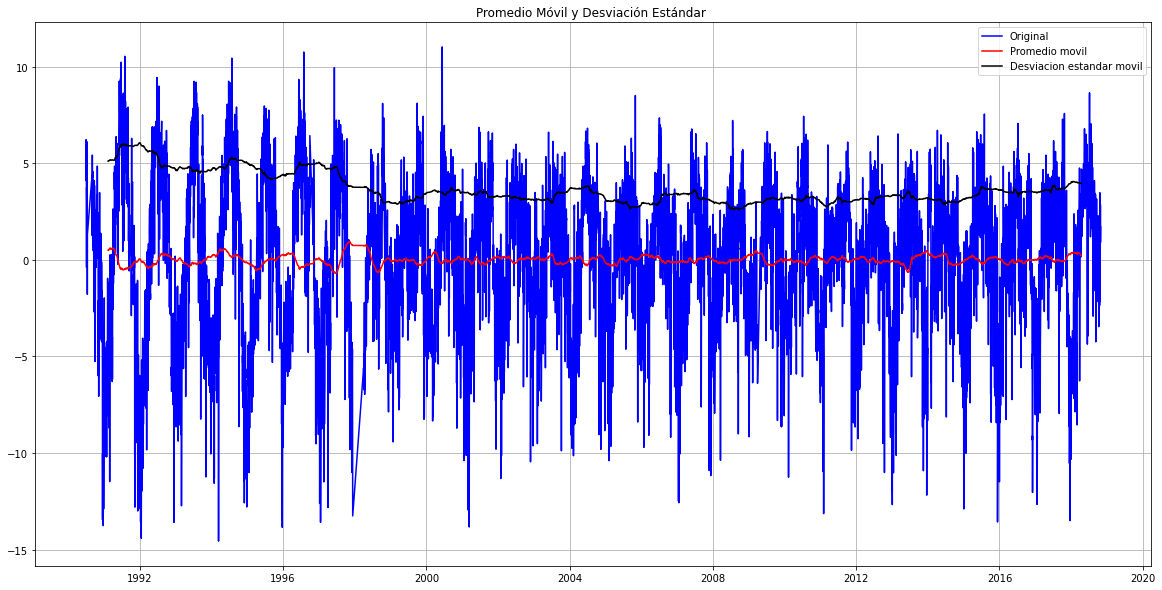

Resultados de la Prueba aumentado de Dickey-Fuller:
Test Statistic                -8.059213e+00
p-value                        1.660416e-12
#Lags Used                     1.700000e+01
Number of Observations Used    1.000000e+04
Critical Value (1%)           -3.431004e+00
Critical Value (5%)           -2.861829e+00
Critical Value (10%)          -2.566924e+00
dtype: float64


In [ ]:
#PROBAREMOS LA ESTACIONARIDAD DE LA SERIE RESIDUO
ts_tmaxresid=decomposition.resid 
ts_tmaxresid.dropna(inplace=True)
test_stationarity(ts_tmaxresid)
#podemos ver que la serie residuo es estacionaria

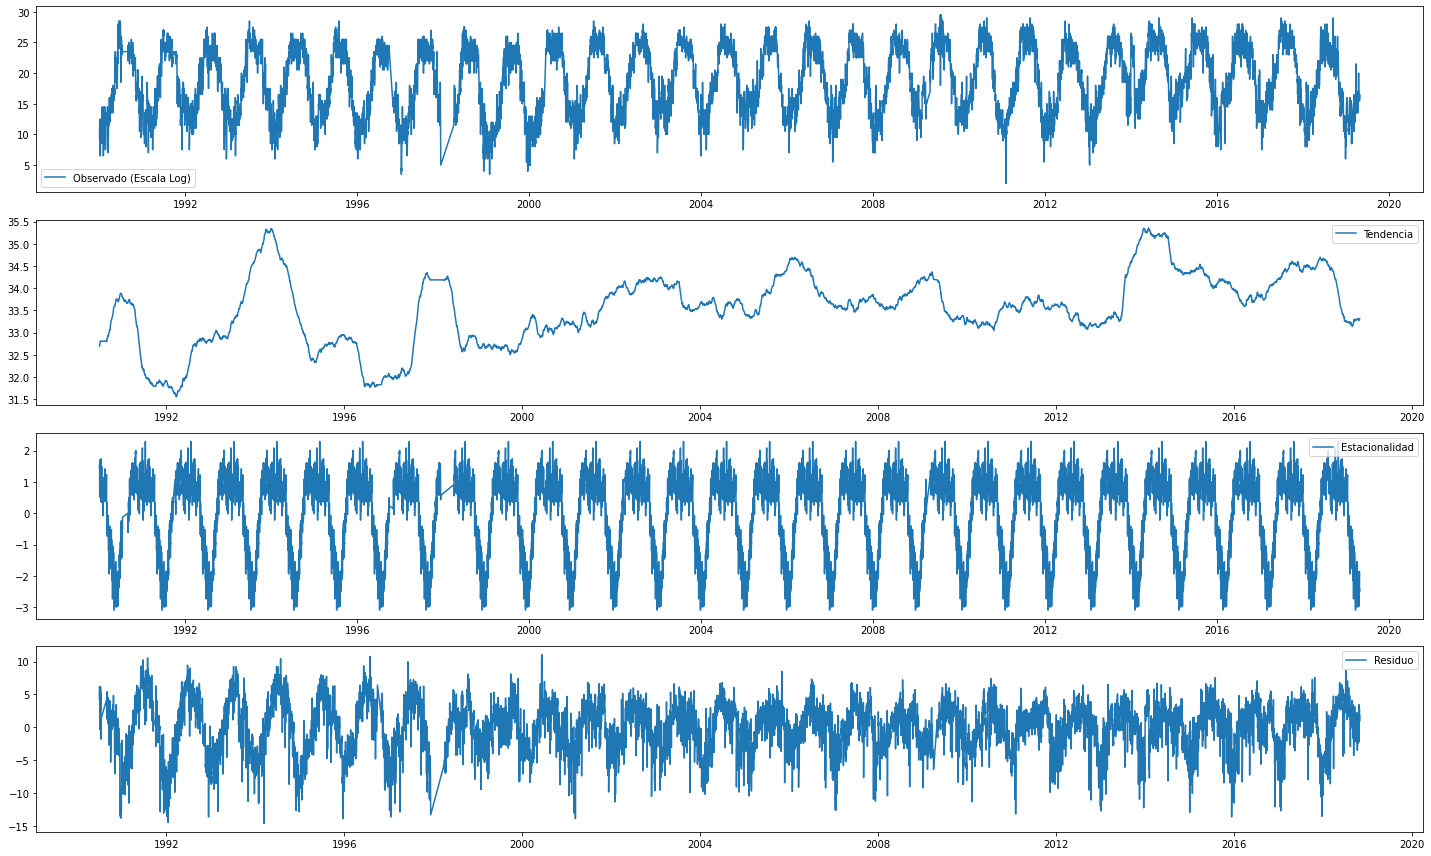

In [ ]:
#DESCOMPONEMOS NUESTRA SERIE DE TIEMPO DE T_Max y T_min
#hacemos datas frames especiales
ts_tmin=df_90["T_min"]
#ts_tmax.tail()
#hacemos la descomposición de la serie de tiempo, obs=tendencia+estacionalidad+residuo
# Método de descomposición usando la biblioteca statsmodels.tsa
decomposition = sm.tsa.seasonal_decompose(ts_tmax.interpolate(), model='additive', freq=365)
# GRAFICAMOS LOS 3 COMPONENTES
trend = decomposition.trend
seasonal = decomposition.seasonal
residue = decomposition.resid
plt.rcParams["figure.figsize"] = (20,12)
plt.subplot(411)
plt.plot(ts_tmin, label='Observado (Escala Log)')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residue, label='Residuo')
plt.legend(loc='best')

plt.tight_layout();


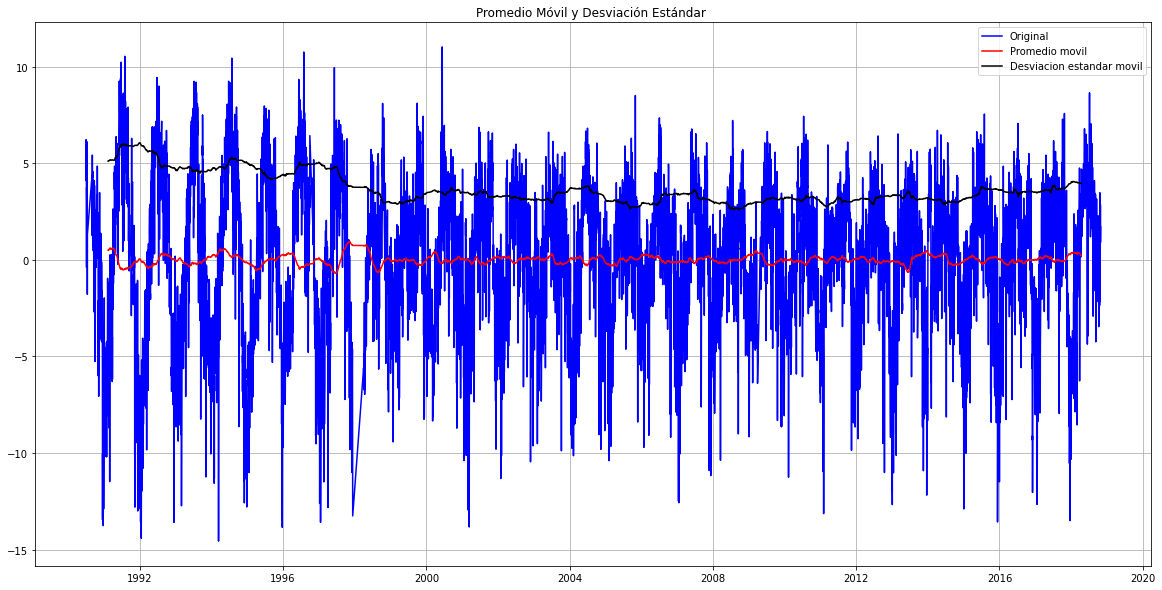

Resultados de la Prueba aumentado de Dickey-Fuller:
Test Statistic                -8.059213e+00
p-value                        1.660416e-12
#Lags Used                     1.700000e+01
Number of Observations Used    1.000000e+04
Critical Value (1%)           -3.431004e+00
Critical Value (5%)           -2.861829e+00
Critical Value (10%)          -2.566924e+00
dtype: float64


In [ ]:
#PROBAREMOS LA ESTACIONARIDAD DE LA SERIE RESIDUO
ts_tminresid=decomposition.resid 
ts_tminresid.dropna(inplace=True)
test_stationarity(ts_tminresid)
#podemos ver que la serie residuo es estacionaria denuevo afortunadamente

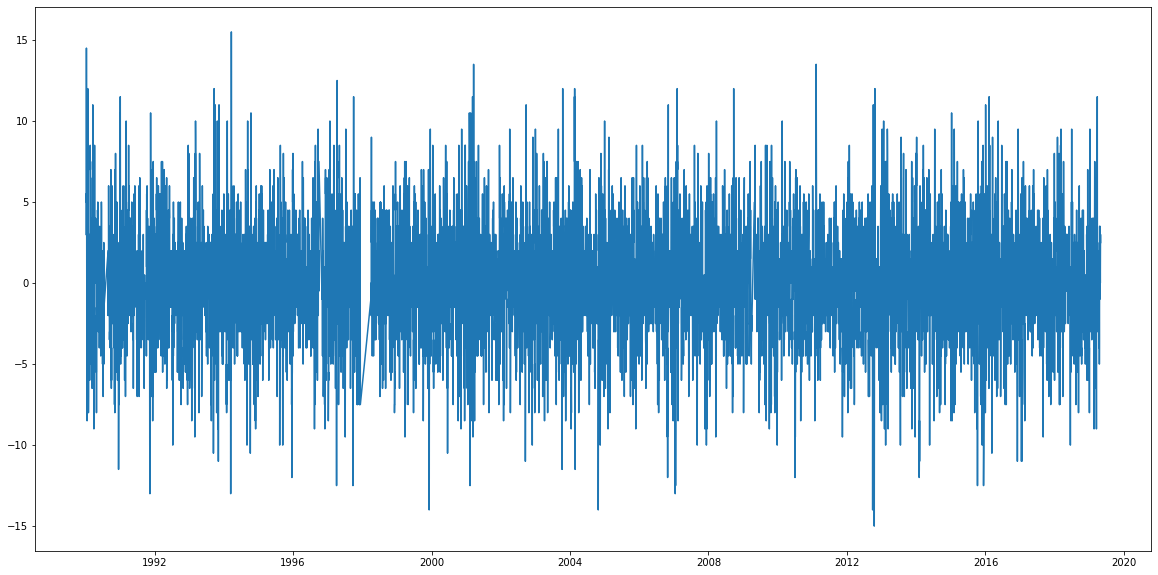

In [ ]:
#DIFERENCIAMOS LOS DATOS DE T_Max Y PROBAMOS SI ES ESTACIONARIA
ts_tmaxd = ts_tmax - ts_tmax.shift(periods=7)
ts_tmaxd.ffill(axis=0, inplace=True)
plt.plot(ts_tmaxd);


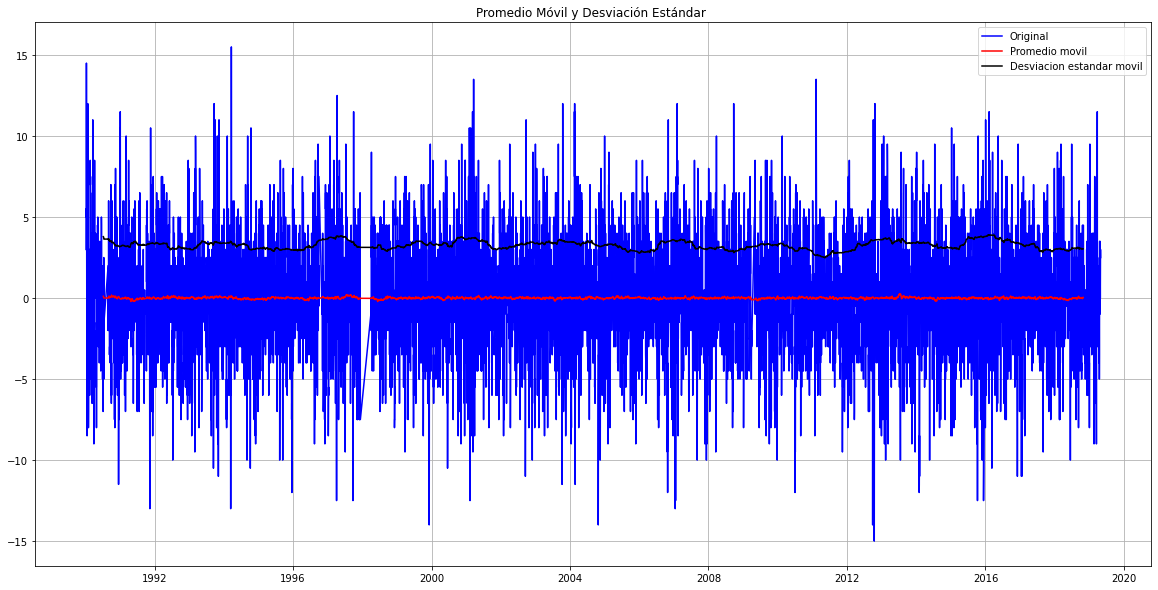

Resultados de la Prueba aumentado de Dickey-Fuller:
Test Statistic                -1.591858e+01
p-value                        7.971858e-29
#Lags Used                     3.800000e+01
Number of Observations Used    1.033600e+04
Critical Value (1%)           -3.430983e+00
Critical Value (5%)           -2.861820e+00
Critical Value (10%)          -2.566919e+00
dtype: float64


In [ ]:
ts_tmaxd.dropna(inplace=True)
test_stationarity(ts_tmaxd)

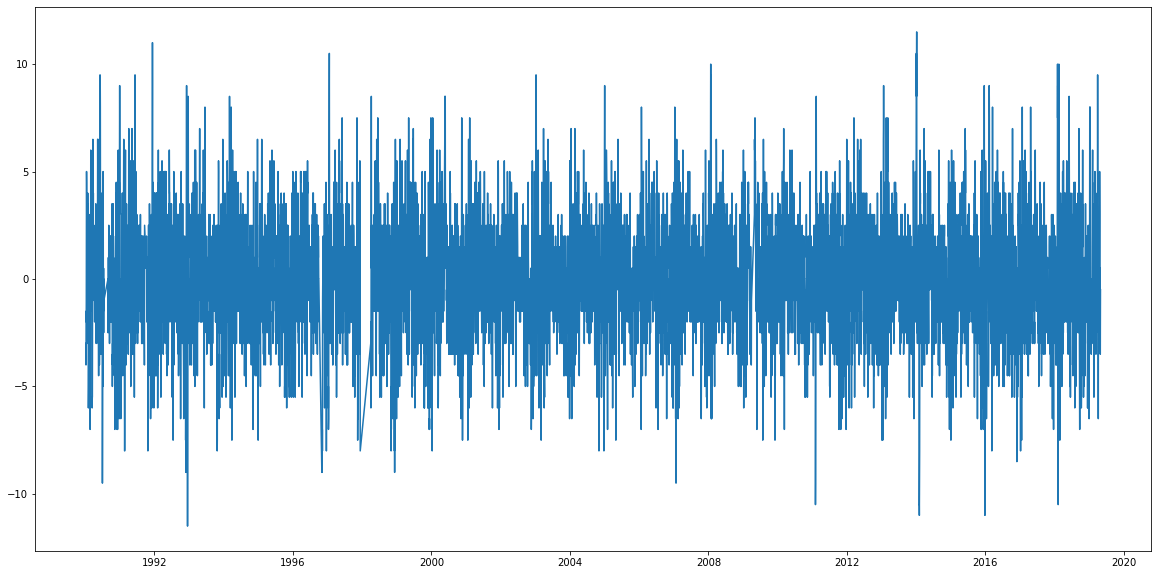

In [ ]:
#HACEMOS LO MISMO PARA T_min
ts_tmind = ts_tmin - ts_tmin.shift(periods=7)
ts_tmind.ffill(axis=0, inplace=True)
plt.plot(ts_tmind);

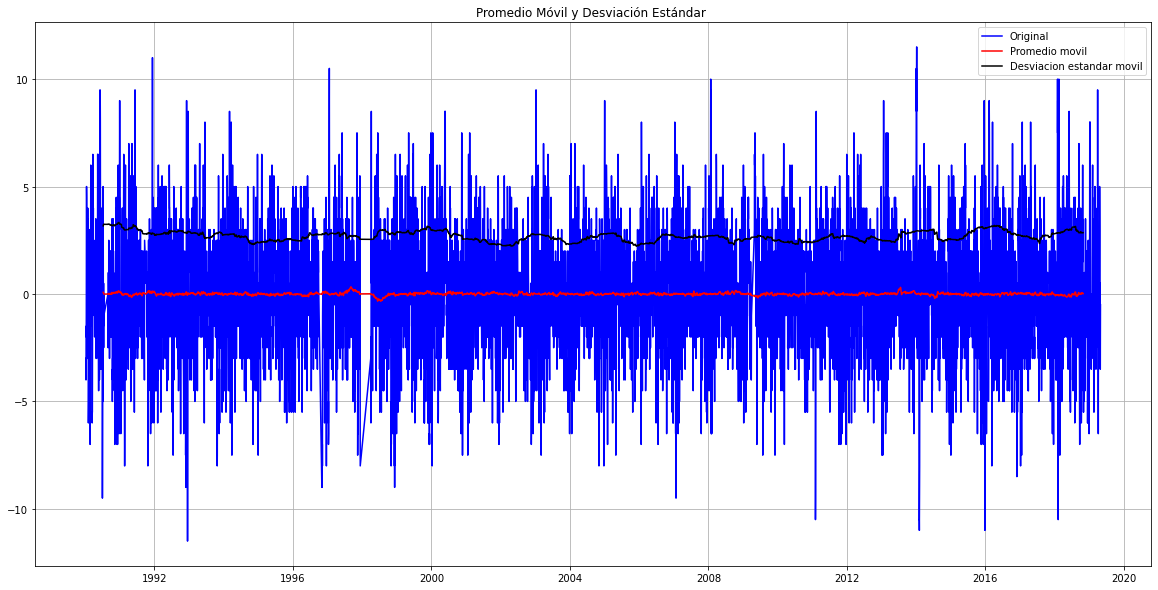

Resultados de la Prueba aumentado de Dickey-Fuller:
Test Statistic                -1.165608e+01
p-value                        1.984032e-21
#Lags Used                     3.800000e+01
Number of Observations Used    1.033600e+04
Critical Value (1%)           -3.430983e+00
Critical Value (5%)           -2.861820e+00
Critical Value (10%)          -2.566919e+00
dtype: float64


In [ ]:
ts_tmind.dropna(inplace=True)
test_stationarity(ts_tmind)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


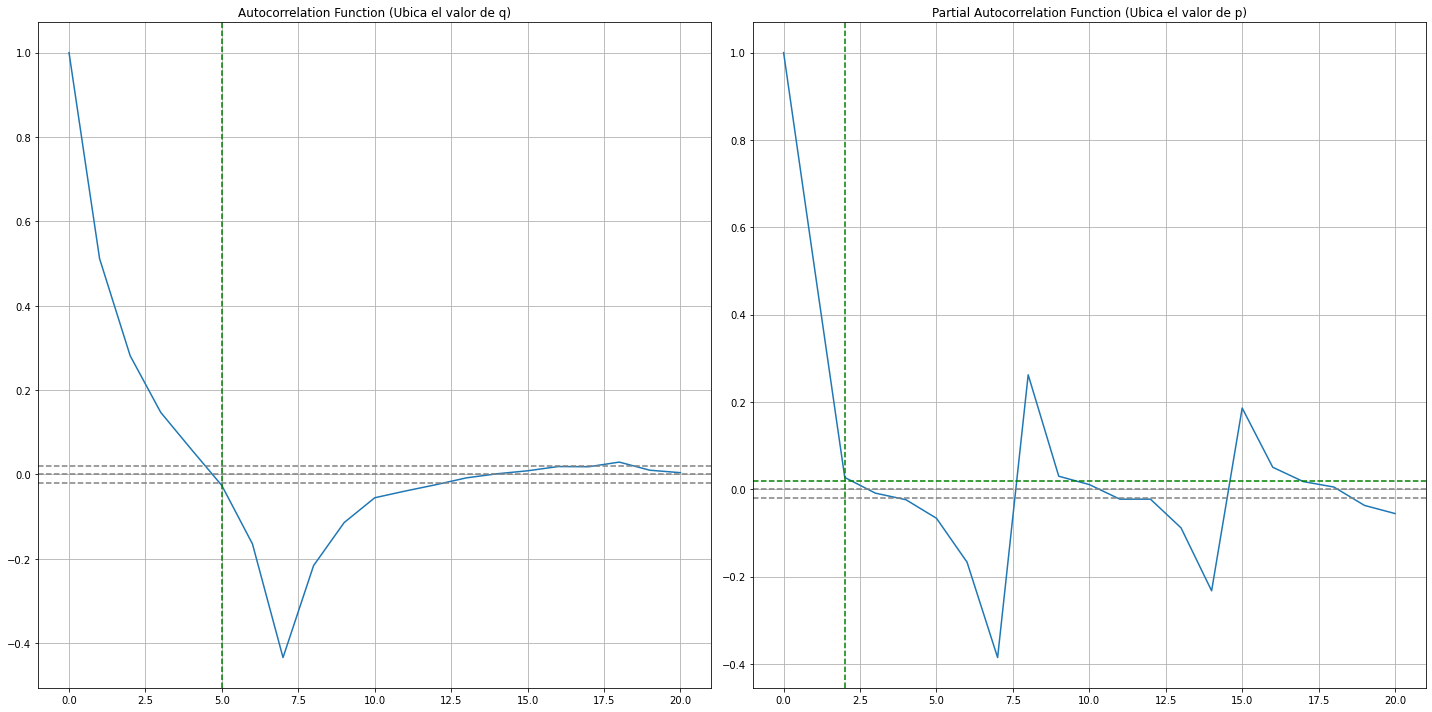

In [ ]:
#APLICAMOS UN MODELO ARIMA A LA TEMPERATURA MAXIMA
#DEFINIMOS LAS FUNCIONES A USAR 
lag_acf = acf(ts_tmaxd, nlags=20)
lag_pacf = pacf(ts_tmaxd, nlags=20, method = 'ols')
plt.rcParams["figure.figsize"] = (20,10)
# Gráfica de ACF (Autocorrelation Function)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_tmaxd)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_tmaxd)), linestyle='--', color='gray')
# Graficamos unas líneas verticales como referencias
plt.axvline(x=5, linestyle='--', color='green')
plt.grid()
plt.title('Autocorrelation Function (Ubica el valor de q)')
# Gráfica de PACF (Partial Autocorrelation Function)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_tmaxd)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_tmaxd)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias 
plt.axvline(x=2, linestyle='--', color='green')
plt.grid()
plt.title('Partial Autocorrelation Function (Ubica el valor de p)')
plt.tight_layout()
#usaremos q=5 y p=2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.T_Max   No. Observations:                10374
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -26368.547
Method:                       css-mle   S.D. of innovations              3.074
Date:                Thu, 25 Feb 2021   AIC                          52745.095
Time:                        22:25:03   BIC                          52774.083
Sample:                             1   HQIC                         52754.889
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0001      0.020     -0.006      0.995      -0.040       0.039
ar.L1.D.T_Max    -0.3124      0.010    -32.346      0.000      -0.331      -0.293
ar.L2.D.T_Max    -0.1806      0.010    -

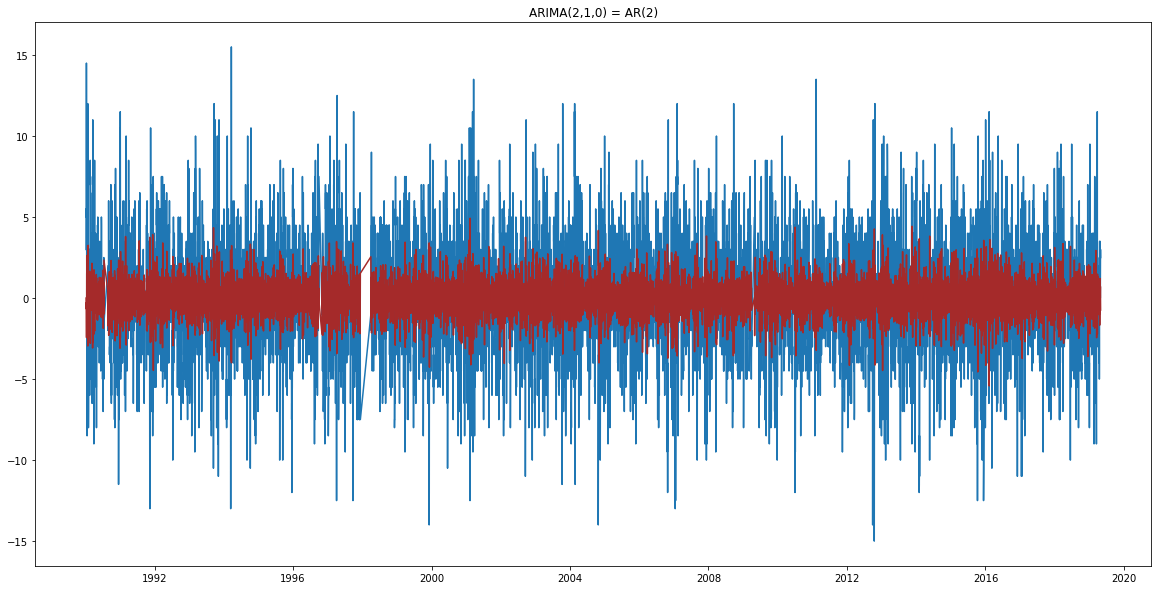

In [ ]:
#USAMOS EL CRITERO AKAIKE PARA SELECCIONAR EL MEJOR MDODELO
# Modelo AR(p): (p,d,q) = (2,1,0) 
model = ARIMA(ts_tmaxd, order=(2,1,0), missing='drop')
results_AR = model.fit(displ=-1)
plt.plot(ts_tmaxd)
plt.plot(results_AR.fittedvalues, color='brown')
plt.title('ARIMA(2,1,0) = AR(2)')
print(results_AR.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.T_Max   No. Observations:                10374
Model:                 ARIMA(0, 1, 5)   Log Likelihood              -25481.905
Method:                       css-mle   S.D. of innovations              2.821
Date:                Thu, 25 Feb 2021   AIC                          50977.809
Time:                        23:01:45   BIC                          51028.538
Sample:                             1   HQIC                         50994.949
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.202e-06   1.63e-05     -0.197      0.844   -3.51e-05    2.87e-05
ma.L1.D.T_Max    -0.4846      0.010    -48.618      0.000      -0.504      -0.465
ma.L2.D.T_Max    -0.1171      0.032     

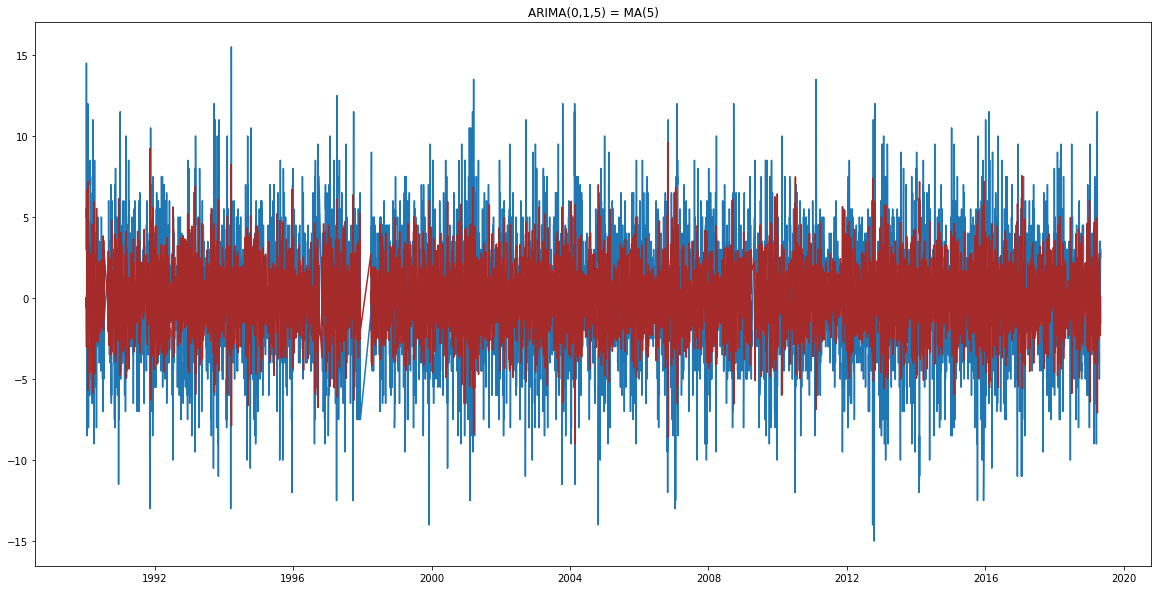

In [ ]:
# Modelo AR(p): (p,d,q) = (0,1,5) 
model = ARIMA(ts_tmaxd, order=(0,1,5), missing='drop')
results_AR = model.fit(displ=-1)
plt.plot(ts_tmaxd)
plt.plot(results_AR.fittedvalues, color='brown')
plt.title("ARIMA(0,1,5) = MA(5)")
print(results_AR.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.T_Max   No. Observations:                10374
Model:                 ARIMA(2, 1, 5)   Log Likelihood              -24604.792
Method:                       css-mle   S.D. of innovations              2.590
Date:                Thu, 25 Feb 2021   AIC                          49227.583
Time:                        23:32:06   BIC                          49292.807
Sample:                             1   HQIC                         49249.621
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.246e-06   1.67e-05     -0.194      0.846    -3.6e-05    2.95e-05
ar.L1.D.T_Max    -0.4663      0.014    -32.724      0.000      -0.494      -0.438
ar.L2.D.T_Max    -0.6438      0.010    -

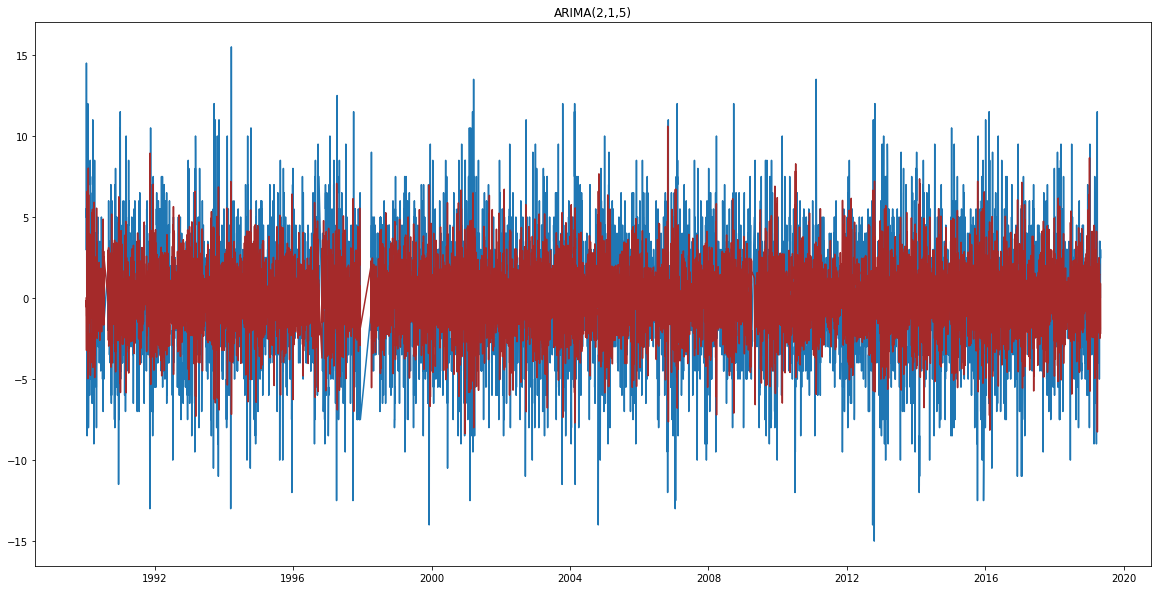

In [ ]:
# Modelo AR(p): (p,d,q) = (2,1,5) 
model = ARIMA(ts_tmaxd, order=(2,1,5), missing='drop')
results_ARtmax = model.fit(displ=-1)
plt.plot(ts_tmaxd)
plt.plot(results_ARtmax.fittedvalues, color='brown')
plt.title("ARIMA(2,1,5)")
print(results_ARtmax.summary())
#ARIMA es el mejor modelo segun el criterio AIC

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


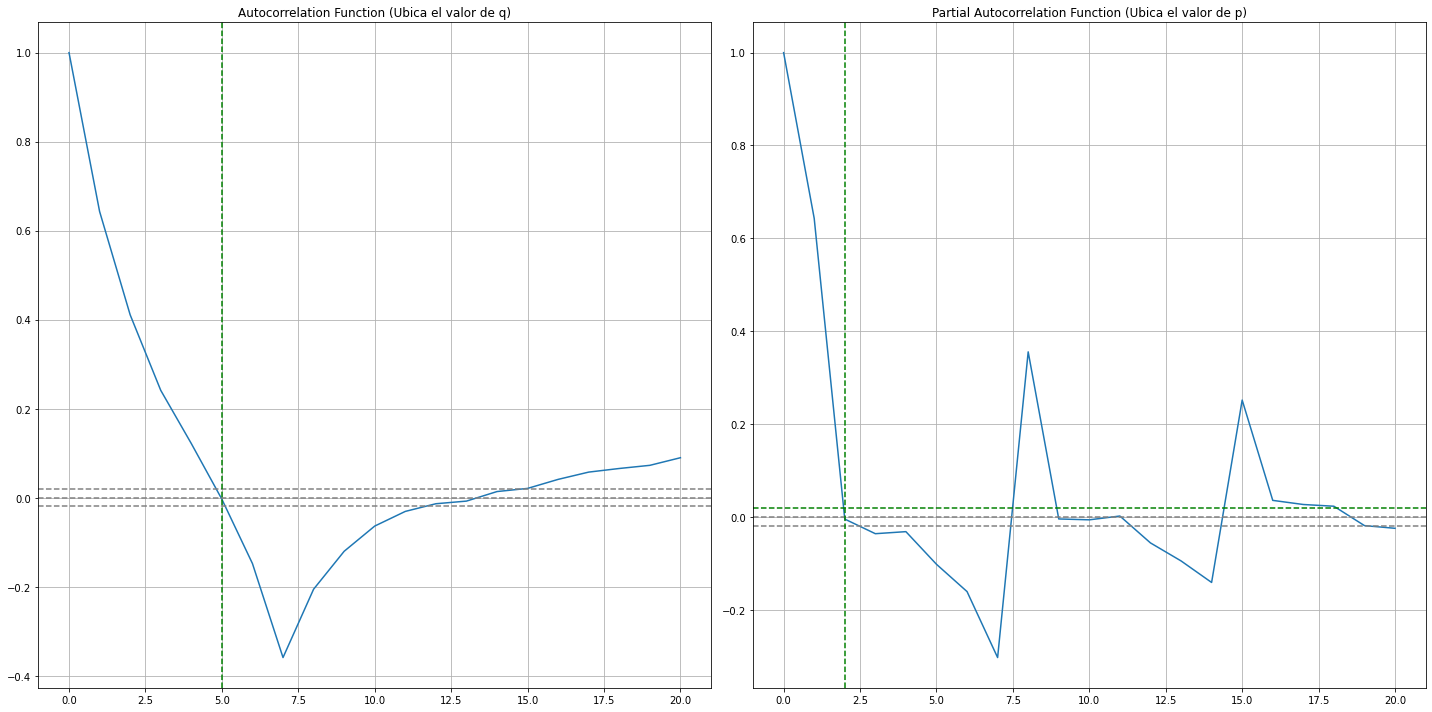

In [ ]:
#APLICAMOS UN MODELO ARIMA A LA TEMPERATURA MINIMA
#DEFINIMOS LAS FUNCIONES A USAR 
lag_acf = acf(ts_tmind, nlags=20)
lag_pacf = pacf(ts_tmind, nlags=20, method = 'ols')
plt.rcParams["figure.figsize"] = (20,10)
# Gráfica de ACF (Autocorrelation Function)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_tmind)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_tmind)), linestyle='--', color='gray')
# Graficamos unas líneas verticales como referencias
plt.axvline(x=5, linestyle='--', color='green')
plt.grid()
plt.title('Autocorrelation Function (Ubica el valor de q)')
# Gráfica de PACF (Partial Autocorrelation Function)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_tmind)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_tmind)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias 
plt.axvline(x=2, linestyle='--', color='green')
plt.grid()
plt.title('Partial Autocorrelation Function (Ubica el valor de p)')
plt.tight_layout()
#usaremos q=5 y p=2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.T_min   No. Observations:                10374
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -23040.719
Method:                       css-mle   S.D. of innovations              2.230
Date:                Thu, 25 Feb 2021   AIC                          46089.438
Time:                        23:18:21   BIC                          46118.426
Sample:                             1   HQIC                         46099.232
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.017      0.012      0.990      -0.032       0.033
ar.L1.D.T_min    -0.1959      0.010    -20.100      0.000      -0.215      -0.177
ar.L2.D.T_min    -0.1220      0.010    -

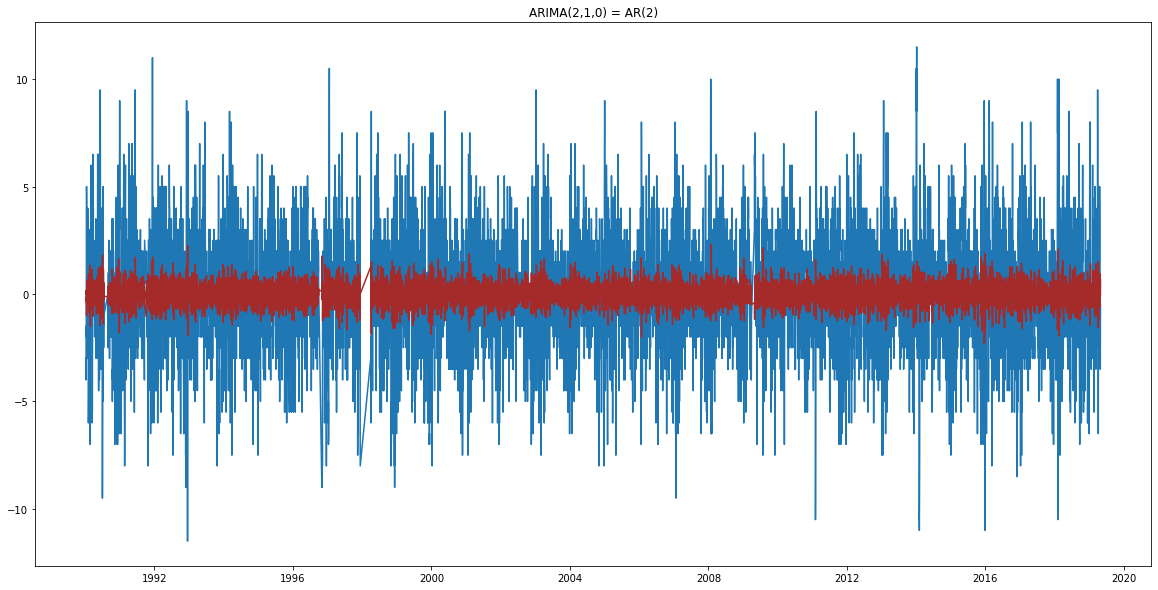

In [ ]:
#USAMOS EL CRITERO AKAIKE PARA SELECCIONAR EL MEJOR MDODELO
# Modelo AR(p): (p,d,q) = (2,1,0) 
model = ARIMA(ts_tmind, order=(2,1,0), missing='drop')
results_AR = model.fit(displ=-1)
plt.plot(ts_tmind)
plt.plot(results_AR.fittedvalues, color='brown')
plt.title('ARIMA(2,1,0) = AR(2)')
print(results_AR.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.T_min   No. Observations:                10374
Model:                 ARIMA(0, 1, 5)   Log Likelihood              -22281.847
Method:                       css-mle   S.D. of innovations              2.072
Date:                Thu, 25 Feb 2021   AIC                          44577.693
Time:                        23:19:36   BIC                          44628.423
Sample:                             1   HQIC                         44594.833
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.638e-06   1.94e-05     -0.239      0.811   -4.28e-05    3.35e-05
ma.L1.D.T_min    -0.3339      0.011    -29.350      0.000      -0.356      -0.312
ma.L2.D.T_min    -0.6624      0.018    -

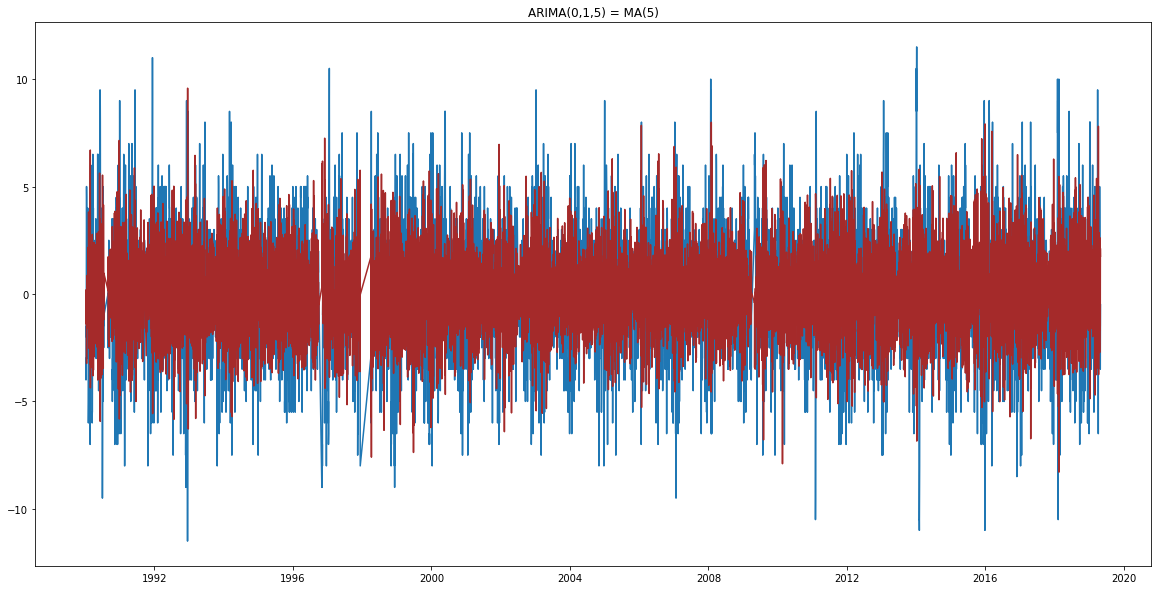

In [ ]:
# Modelo AR(p): (p,d,q) = (0,1,5) 
model = ARIMA(ts_tmind, order=(0,1,5), missing='drop')
results_AR = model.fit(displ=-1)
plt.plot(ts_tmind)
plt.plot(results_AR.fittedvalues, color='brown')
plt.title("ARIMA(0,1,5) = MA(5)")
print(results_AR.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.T_min   No. Observations:                10374
Model:                 ARIMA(2, 1, 5)   Log Likelihood              -21086.638
Method:                       css-mle   S.D. of innovations              1.845
Date:                Thu, 25 Feb 2021   AIC                          42191.275
Time:                        23:31:01   BIC                          42256.499
Sample:                             1   HQIC                         42213.313
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -3.89e-06   1.83e-05     -0.213      0.832   -3.98e-05     3.2e-05
ar.L1.D.T_min    -1.2128      0.011   -114.602      0.000      -1.234      -1.192
ar.L2.D.T_min    -0.5467      0.009    -

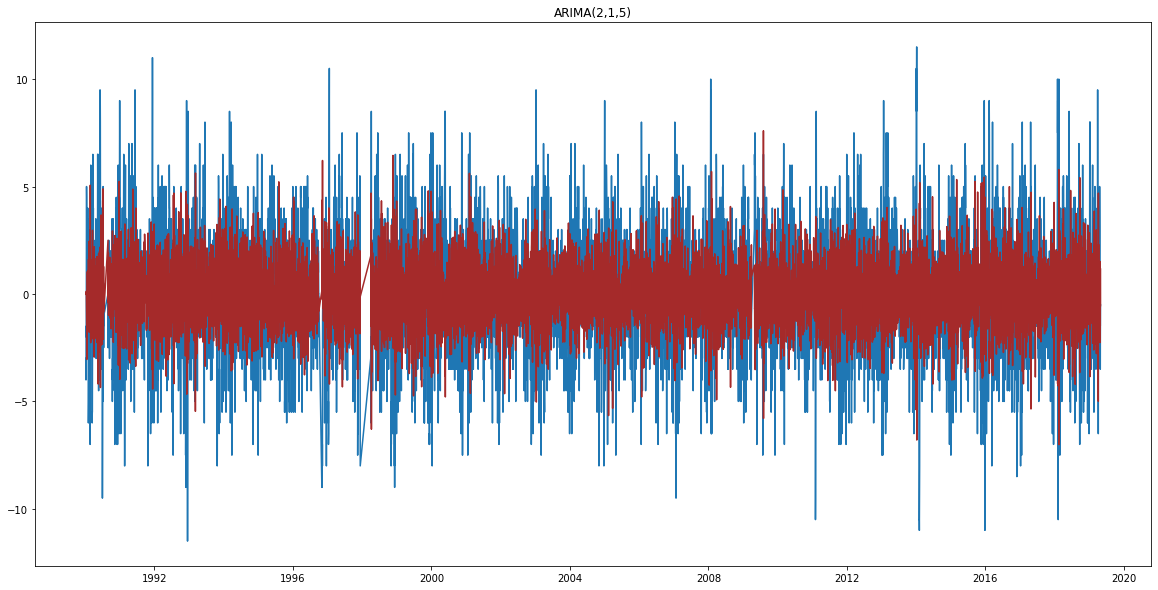

In [ ]:
# Modelo AR(p): (p,d,q) = (2,1,5) 
model = ARIMA(ts_tmind, order=(2,1,5), missing='drop')
results_ARtmin = model.fit(displ=-1)
plt.plot(ts_tmind)
plt.plot(results_ARtmin.fittedvalues, color='brown')
plt.title("ARIMA(2,1,5)")
print(results_ARtmin.summary())
#ARIMA es el mejor modelo segun el criterio AIC

In [ ]:
#PASAMOS NUESTRAS PREDICCIONES A SERIES DE TIEMPO DE T_MAX Y T_MIN
prediccion_ARIMAd = pd.Series(results_ARtmax.fittedvalues, copy=True)
#print(prediccion_ARIMA)
prediccion_ARIMAd2=pd.Series(results_ARtmin.fittedvalues, copy=True)
#print(prediccion_ARIMA2)
predictions_ARIMA = pd.Series(ts_tmax, index = ts_tmax.index)
predictions_ARIMA = predictions_ARIMA.add(prediccion_ARIMAd)
predictions_ARIMA2 = pd.Series(ts_tmin, index = ts_tmin.index)
predictions_ARIMA2 = predictions_ARIMA2.add(prediccion_ARIMAd2)

Text(0, 0.5, 'Temperatura maxima °C')

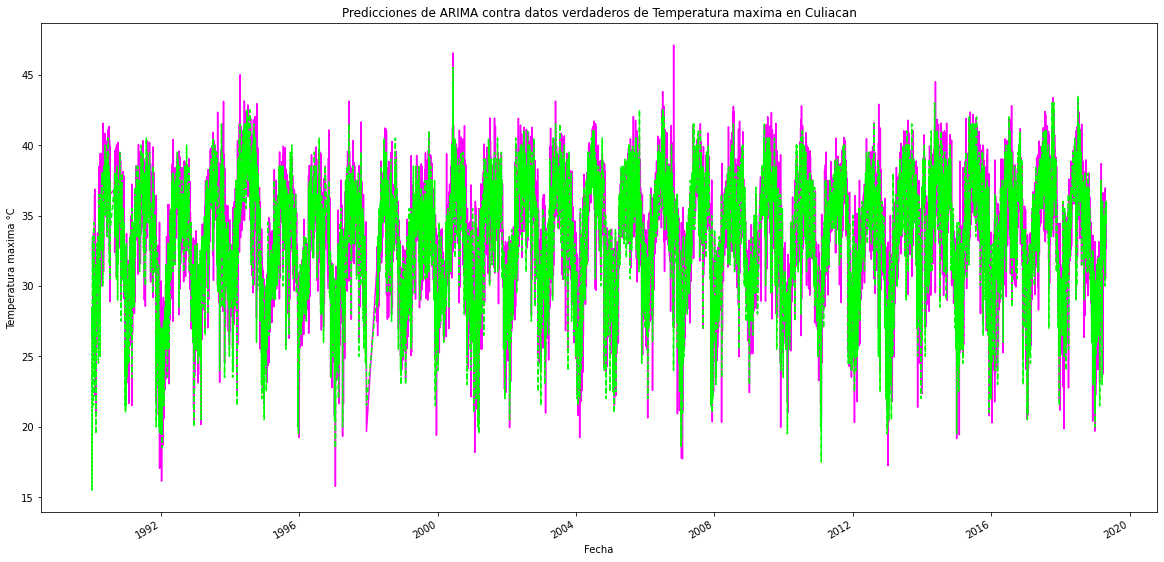

In [ ]:
#GRAFICAMOS LAS PREDICCIONES EN CONJUNTO A LOS DATOS ORIGINALES
axes=predictions_ARIMA.plot(figsize=(20,10), linestyle="-", color="magenta",alpha=1)
axes=ts_tmax.plot(figsize=(20,10), linestyle="--", color="lime", alpha=1)
plt.title("Predicciones de ARIMA contra datos verdaderos de Temperatura maxima en Culiacan")
plt.ylabel("Temperatura maxima °C")
#podemos ver como la prediccion se parece mucho a los datos medidos

Text(0, 0.5, 'Temperatura minima °C')

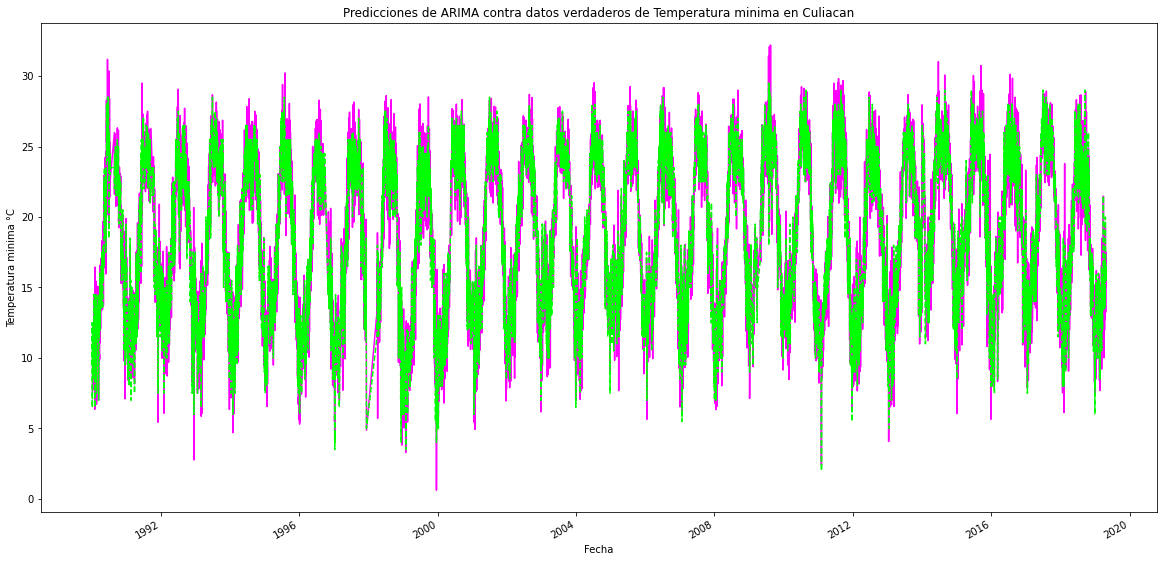

In [ ]:
#GRAFICAMOS LAS PREDICCIONES EN CONJUNTO A LOS DATOS ORIGINALES
axes=predictions_ARIMA2.plot(figsize=(20,10), linestyle="-", color="magenta",alpha=1)
axes=ts_tmin.plot(figsize=(20,10), linestyle="--", color="lime", alpha=1)
plt.title("Predicciones de ARIMA contra datos verdaderos de Temperatura minima en Culiacan")
plt.ylabel("Temperatura minima °C")
#podemos ver como la prediccion se parece mucho a los datos medidos